In [ ]:
#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
#The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
#Several constraints were placed on the selection of these instances from a larger database.
#In particular, all patients here are females at least 21 years old.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv("diabeties.csv")
df

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
df.info()
# There are 768 rows & 9 columns
# The datatype is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df.head(10)

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [30]:
df.isna().sum()
# There are no missing values
# There are no null values or NaN values present.

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [31]:
(df.isna().sum()/len(df))*100
# There are no missing values 
# We will not use Imputation
# We will not drop any columns

pregnant     0.0
glocose      0.0
bp           0.0
skin         0.0
insulin      0.0
bmi          0.0
predigree    0.0
age          0.0
target       0.0
dtype: float64

In [50]:
features=df.iloc[:,:-2] # Number of rows , number of columns -2
target=df.iloc[:,-1] # Number of rows 

In [51]:
features.head(1)
# Pregnant,glocose,bp,skin and insulin are integers.
# bmi and predigree are float

,pregnant,glocose,bp,skin,insulin,bmi,predigree
0,6,148,72,35,0,33.6,0.627


In [34]:
target
# Target consists of binary values 0 and 1
# The dtype of the target is int64

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [35]:
features.info()
# There are 768 rows & 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [58]:
df.pregnant.value_counts()


pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.7878787878787878
[[132  14]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [39]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [40]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.7792207792207793
[[140   6]
 [ 45  40]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       146
           1       0.87      0.47      0.61        85

    accuracy                           0.78       231
   macro avg       0.81      0.71      0.73       231
weighted avg       0.80      0.78      0.76       231



In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain_s=ss.fit_transform(xtrain)
xtest_s=ss.transform(xtest)

In [42]:
svm=SVC()
svm.fit(xtrain_s,ytrain)
ypred=svm.predict(xtest_s)

In [43]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.7792207792207793
[[133  13]
 [ 38  47]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.78      0.55      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.7748917748917749
[[129  17]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.59      0.66        85

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



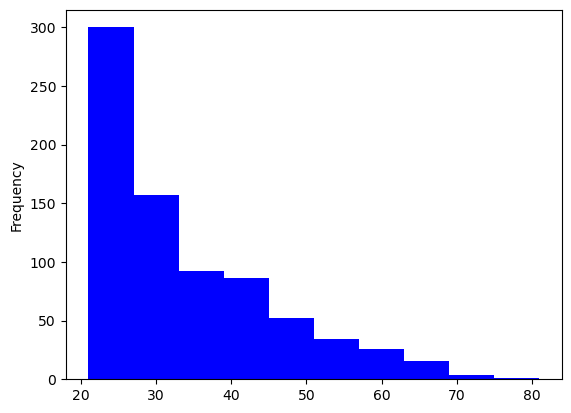

In [55]:
df.age.plot(color="blue",kind="hist")
plt.show()

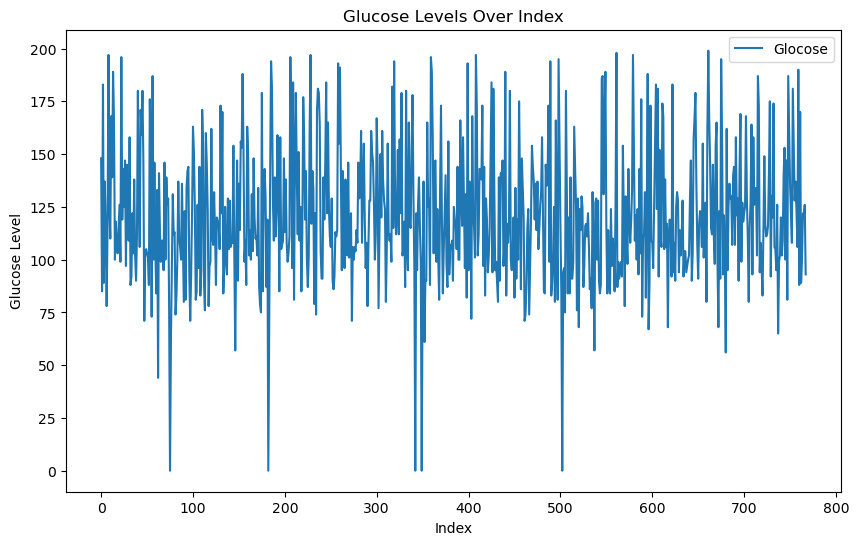

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['glocose'], label='Glocose')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Over Index')
plt.legend()
plt.show()

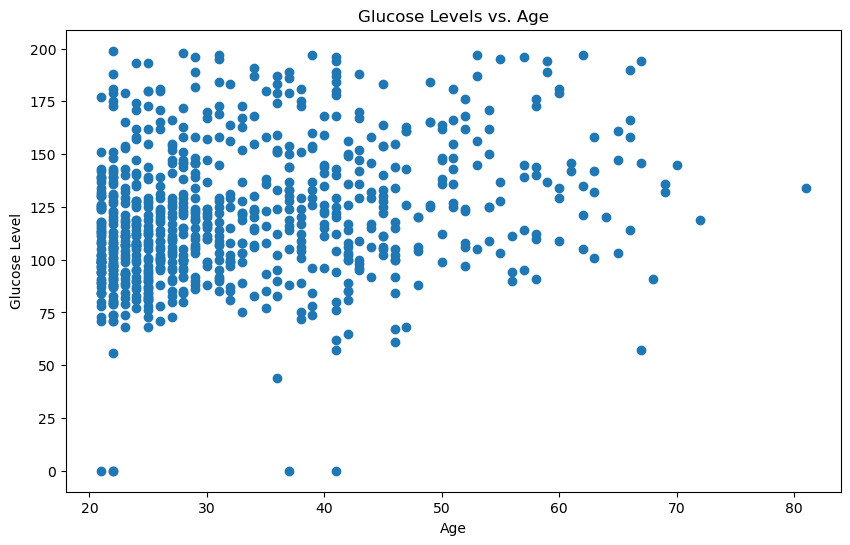

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['glocose'])
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels vs. Age')
plt.show()